In [1]:
import pandas as pd
import numpy as np
import os


# 경로 설정
base_path = '/Users/jeonseoyeong/Desktop/패스트캠퍼스 20기(파이썬)/팀플/'

# 변수명과 파일명 쌍 정의
file_list = {
    'aisles': 'aisles.csv',
    'order_prior': 'order_products__prior.csv',
    'order_train': 'order_products__train.csv',
    'orders': 'orders.csv',
    'products': 'products.csv',
    'departments': 'departments.csv'
}

# 반복문으로 개별 변수에 할당
for var_name, file_name in file_list.items():
    globals()[var_name] = pd.read_csv(os.path.join(base_path, file_name))

In [25]:
# products 통합 데이터셋(products + aisles + departments)
products_copy = products
products_copy = products_copy.merge(aisles, on='aisle_id', how='left')
products_merged = products_copy.merge(departments, on='department_id', how='left')
products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [3]:
# 과거 구매 데이터(order_prior + orders + products + departments)
orders_prior = orders[orders['eval_set'] == 'prior']
prior_df = order_prior.merge(orders_prior, on='order_id', how='left')
prior_df = prior_df.merge(products, on='product_id', how='left')
prior_df = prior_df.merge(departments, on='department_id', how='left')
prior_df = prior_df.merge(aisles, on='aisle_id', how='left')

prior_df['days_since_prior_order'] = prior_df['days_since_prior_order'].fillna(0)
prior_df

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,produce,fresh fruits


In [31]:
products_merged[products_merged['product_id']==11908]

,product_id,product_name,aisle_id,department_id,aisle,department
11907,11908,+Energy Black Cherry Vegetable & Fruit Juice,31,7,refrigerated,beverages


### EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 지정
plt.rcParams['font.family'] = 'AppleGothic'

# 한글폰트 사용 시 -기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

In [ ]:
# 상품별 재구매율 분포
# 카테고별 재구매율
# 인기상품 확인 -> 주문 수 높은 상품 + 재구매율 높은 상품 (교집합) 범위설정 -> 사분위수
# 장바구니의 첫번째 상품과 재구매율의 연관성 확인
# 개인 장바구니 품목을 확인하여 다른 사람 장바구니와 비교한 후 인기 상품을 확인하여 재구매율 비교
# 요일, 시간대별 재구매율 -> x(완료)
# 고객 별 평균 구매 간격 + 카테고리 별 평균 구매 간격 -> 고객별, 카테고리별로 얼마나 재구매가 일어나는지

In [44]:
## 재구매율 분포

### 한 고객이 구매한 모든 상품 건수 중에 재구매된 상품 건수 비율
## (상품 단위 )
## 고객이 10개의 상품을 샀고, 그중 4개가 이전에 샀던 것 → 0.4

# ((1)) 고객별 총 주문 수 계산

total_order_per_user = prior_df.groupby('user_id')['order_id'].count().reset_index()
total_order_per_user.columns = ['user_id', 'total_order']


# ((2)) 고객별 재구매 건 수 계산

reordered_per_user = prior_df[prior_df['reordered']==1].groupby('user_id')['order_id'].count().reset_index()
reordered_per_user.columns = ['user_id', 'reordered_count']

# 두 데이터 병합
user_reorder = pd.merge(total_order_per_user, reordered_per_user, on='user_id', how='left')
user_reorder['reordered_count'] = user_reorder['reordered_count'].fillna(0)

# 고객별 재구매 비율 계산
user_reorder['reorder_ratio'] = user_reorder['reordered_count'] / user_reorder['total_order']

# 결과 확인
user_reorder.head()




### 고객의 주문들 중에서, 재구매 상품이 하나라도 포함된 주문의 비율
## (주문 단위)
# 총 10번 주문했는데, 그중 6번 주문에 재구매 상품이 있음 → 0.6


# 고객별 주문 ID 목록 가져오기
user_order_df = prior_df[['user_id', 'order_id', 'reordered']].drop_duplicates()

# (1) 고객별 총 주문 수
total_order_per_user = user_order_df.groupby('user_id')['order_id'].nunique().reset_index()
total_order_per_user.columns = ['user_id', 'total_orders']

# (2) 재구매 상품이 포함된 주문만 필터링
reordered_orders = user_order_df[user_order_df['reordered'] == 1][['user_id', 'order_id']].drop_duplicates()
reordered_order_count = reordered_orders.groupby('user_id')['order_id'].count().reset_index()
reordered_order_count.columns = ['user_id', 'reordered_orders']

# (3) 병합 후 비율 계산
user_reorder = pd.merge(total_order_per_user, reordered_order_count, on='user_id', how='left')
user_reorder['reordered_orders'] = user_reorder['reordered_orders'].fillna(0)
user_reorder['reorder_ratio'] = user_reorder['reordered_orders'] / user_reorder['total_orders']
user_reorder

,user_id,total_orders,reordered_orders,reorder_ratio
0,1,10,9.0,0.900000
1,2,14,12.0,0.857143
2,3,12,11.0,0.916667
3,4,5,1.0,0.200000
4,5,4,3.0,0.750000
...,...,...,...,...
206204,206205,3,2.0,0.666667
206205,206206,67,63.0,0.940299
206206,206207,16,15.0,0.937500
206207,206208,49,48.0,0.979592


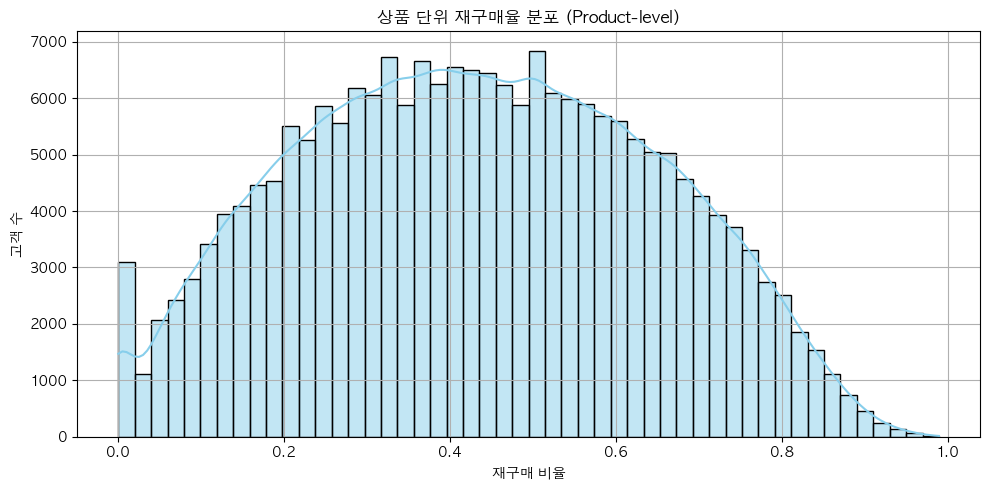

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 5))
sns.histplot(user_reorder['reorder_ratio'], bins=50, kde=True, color='skyblue')
plt.title('상품 단위 재구매율 분포 (Product-level)')
plt.xlabel('재구매 비율')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()


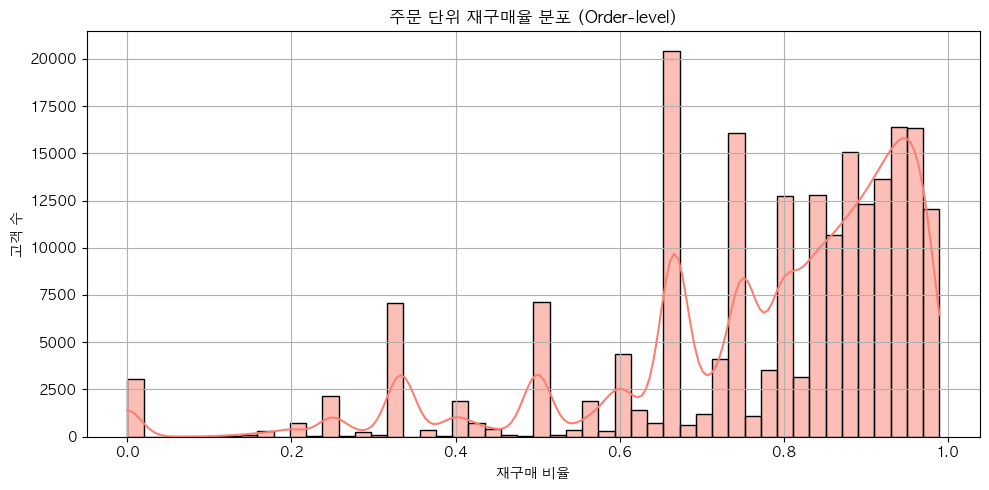

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(user_reorder2['reorder_ratio'], bins=50, kde=True, color='salmon')
plt.title('주문 단위 재구매율 분포 (Order-level)')
plt.xlabel('재구매 비율')
plt.ylabel('고객 수')
plt.grid(True)
plt.tight_layout()
plt.show()

- 여기서 주문 단위 재주문은 상품별이 아닌, 주문을 할 때 재주문하는 상품이 들어있냐 없냐를 뜻함 !!
- 재구매를 하는 상품이 하나라도 있는 경우가 많다.
- 그러나 상품단위 재구매율 분포를 보면 0.3~0.5가 가장 많다.(즉, 상품 하나하나에 대해 다시 사는 비율은 그리 높지 않다는걸 의미)


-> 고객은 여러 상품을 사보지만, 대부분은 주문에는 한 두개라도 익숙한 상품 (재구매 상품)을 담는다.
 -> 즉, 고객은 늘 다시 사는 익숙한 몇몇 상품을 중심으로, 새로운 상품들도 구매하는 경향을 보인다

 그렇다면, 어떤 상품이 재구매율이 높을까???


In [105]:
## (1) 상품별 재구매율 분포 

product_reorder_rate = prior_df.groupby('product_id').agg( total_orders = ('reordered', 'count'), total_reorders = ('reordered', 'sum'))

product_reorder_rate['reorder_rate'] = product_reorder_rate['total_reorders'] / product_reorder_rate['total_orders']

product_reorder_rate = product_reorder_rate.sort_values(by='reorder_rate', ascending=False)


product_reorder_rate = product_reorder_rate.merge(products_merged, on = 'product_id', how='left')

top_10_product_reorder_rate = product_reorder_rate.head(10)


top_10_product_reorder_rate.set_index('product_name')[['total_orders', 'total_reorders', 'reorder_rate', 'aisle', 'department']]

,total_orders,total_reorders,reorder_rate,aisle,department
product_name,,,,,
Raw Veggie Wrappers,68,64,0.941176,prepared meals,deli
Serenity Ultimate Extrema Overnight Pads,87,81,0.931034,feminine care,personal care
Orange Energy Shots,13,12,0.923077,energy sports drinks,beverages
Chocolate Love Bar,101,93,0.920792,candy chocolate,snacks
Soy Powder Infant Formula,35,32,0.914286,baby food formula,babies
Simply Sleep Nighttime Sleep Aid,45,41,0.911111,other,other
"Energy Shot, Grape Flavor",22,20,0.909091,energy sports drinks,beverages
Russian River Valley Reserve Pinot Noir,30,27,0.900000,red wines,alcohol
Sparking Water,60,54,0.900000,water seltzer sparkling water,beverages


/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/3239678157.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aisle_reorder.head(10), x='reordered', y='aisle', palette = sns.color_palette('pastel'))


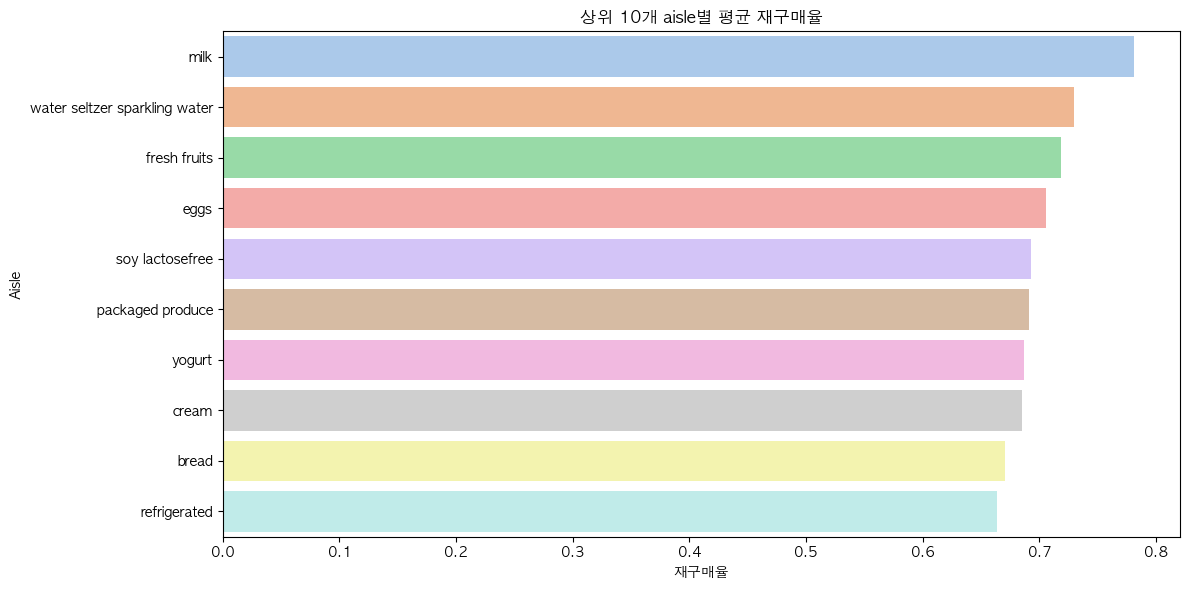

In [184]:
# aisle 소분류별 재구매율 순위 

aisle_reorder = prior_df.groupby('aisle')['reordered'].mean().reset_index()
aisle_reorder = aisle_reorder.sort_values(by='reordered', ascending=False)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=aisle_reorder.head(10), x='reordered', y='aisle', palette = sns.color_palette('pastel'))
plt.title('상위 10개 aisle별 평균 재구매율')
plt.xlabel('재구매율')
plt.ylabel('Aisle')
plt.tight_layout()
plt.show()


/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/3182211123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_reorder, x='reordered', y='department', palette = sns.color_palette('pastel'))
/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/3182211123.py:5: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=department_reorder, x='reordered', y='department', palette = sns.color_palette('pastel'))


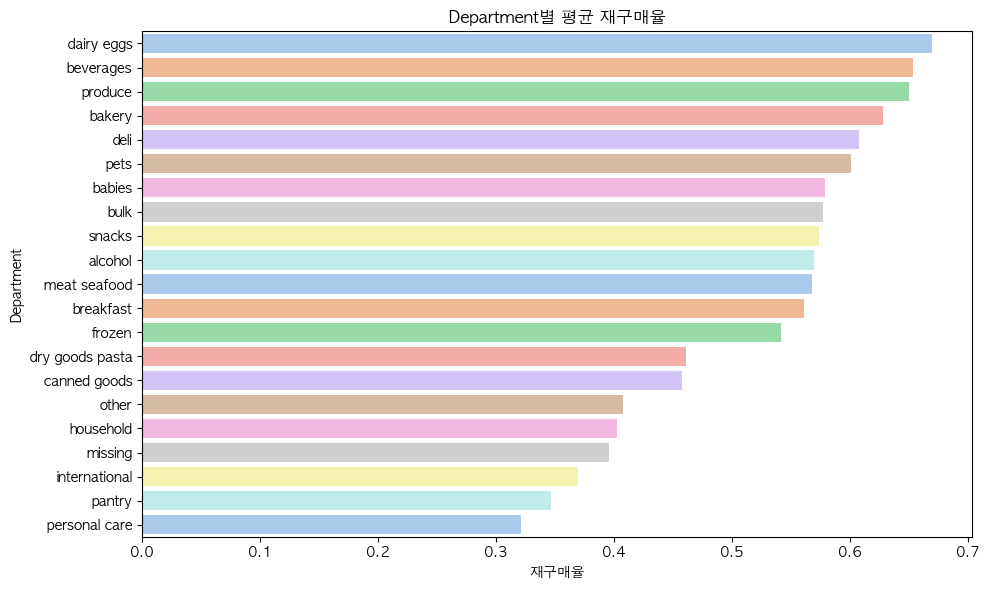

In [182]:
department_reorder = prior_df.groupby('department')['reordered'].mean().reset_index()
department_reorder = department_reorder.sort_values(by='reordered', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=department_reorder, x='reordered', y='department', palette = sns.color_palette('pastel'))
plt.title('Department별 평균 재구매율')
plt.xlabel('재구매율')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


상품별 :  다양한 식음료, 개인 관리, 유아용품, 주류 등이 포함되어 있음
카테고리별 : 유제품, 음료, 농산물이 가장 높음

그렇다면, 주문건수도 많으면서 재구매율도 높은 상품은 뭘까?

인기상품은 주문건수, 재구매율을 몇으로 잡아야 할까?

In [15]:
### 상품별 주문건수 집계


# - 데이터 개수가 너무 많아 그래프로는 파악 힘듦
# product_order_counts = prior_df.groupby('product_id')['order_id'].count()

# plt.figure(figsize=(10,5))
# plt.hist(product_order_counts, bins=50)
# plt.title('상품별 주문건수 분포')
# plt.xlabel('주문건수')
# plt.ylabel('상품 개수')
# plt.xlim(0, 20000)  # 필요하면 x축 범위 제한
# plt.show()


product_quantiles = product_order_counts.quantile([0.75, 0.8, 0.9, 1.0])
print(product_quantiles)
# 즉, 상위 25%는 주문건수 260건 이상이어야함.
# 1021개 이상 팔린 상품이 상위 10% 이내.

NameError: name 'product_order_counts' is not defined

In [139]:
reorder_rate_90p = product_reorder_rate['reorder_rate'].quantile([0.75, 0.8, 0.9, 1.0])
print(f"상위 10% 재구매율 기준값: {reorder_rate_90p}")

# 재구매율 상위 10%는 0.63정도,  상위 25%는 0.52정도

상위 10% 재구매율 기준값: 0.75    0.529307
0.80    0.560554
0.90    0.634010
1.00    0.941176
Name: reorder_rate, dtype: float64


그렇다면 재구매율, 주문 건수 모두 상위 10% 이내에 드는 인기상품을 파악해보자 !

In [149]:
# 인기상품 선별 !

order_90_percentile = 1021  # 예: 주문수 상위 10% 컷
reorder_75_percentile = 0.63  # 재구매율 상위 10% 컷

# 인기 상품 필터링
popular_products = product_reorder_rate[
    (product_reorder_rate['total_orders'] >= order_90_percentile) &
    (product_reorder_rate['reorder_rate'] >= reorder_75_percentile)
]

print(f"주문수 상위 10% 이상 & 재구매율 상위 10% 이상인 인기 상품 개수: {len(popular_products)}")

# 상위 인기 상품 리스트 간단히 확인
print(popular_products[['product_name', 'total_orders', 'reorder_rate']].head(10))


주문수 상위 10% 이상 & 재구매율 상위 10% 이상인 인기 상품 개수: 1524
                       product_name  total_orders  reorder_rate
31  Half And Half Ultra Pasteurized          2921      0.861691
34       Whole Organic Omega 3 Milk          9108      0.860233
36  Organic Lactose Free Whole Milk          8477      0.859030
38   Organic Homogenized Whole Milk          3970      0.857683
39             Ultra-Purified Water          1489      0.857623
51         Milk, Organic, Vitamin D         20198      0.854342
54         Organic Reduced Fat Milk         35663      0.850686
56                        Goat Milk          5185      0.849952
72                           Banana        472565      0.843501
78              Organic  Whole Milk          9842      0.841191


/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/1049347880.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=aisle_counts.head(10).index, x=aisle_counts.head(10).values, palette = sns.color_palette('pastel'))


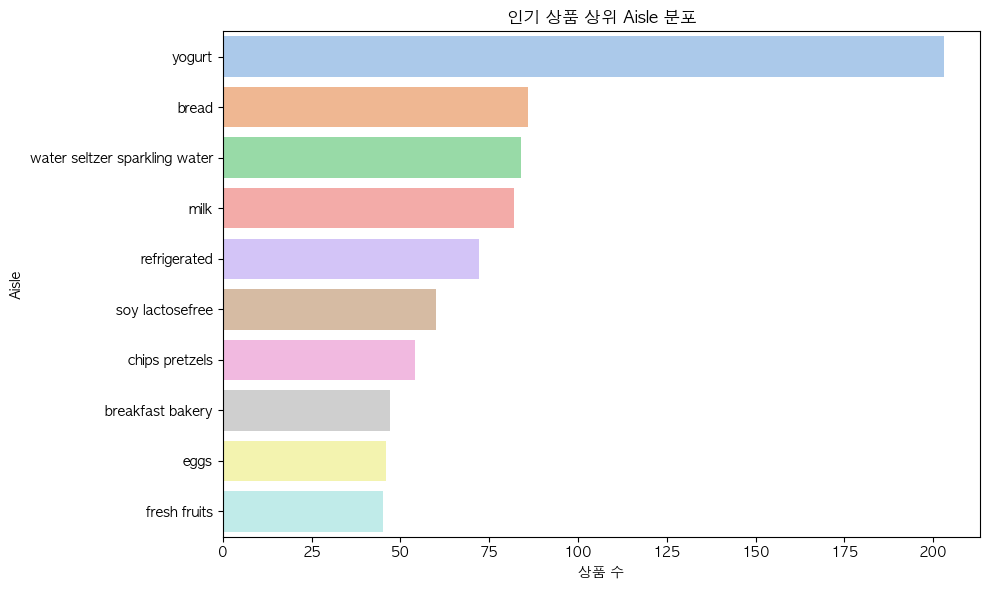

/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/1049347880.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dept_counts.index, x=dept_counts.values, palette = sns.color_palette('pastel'))
/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/1049347880.py:35: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=dept_counts.index, x=dept_counts.values, palette = sns.color_palette('pastel'))


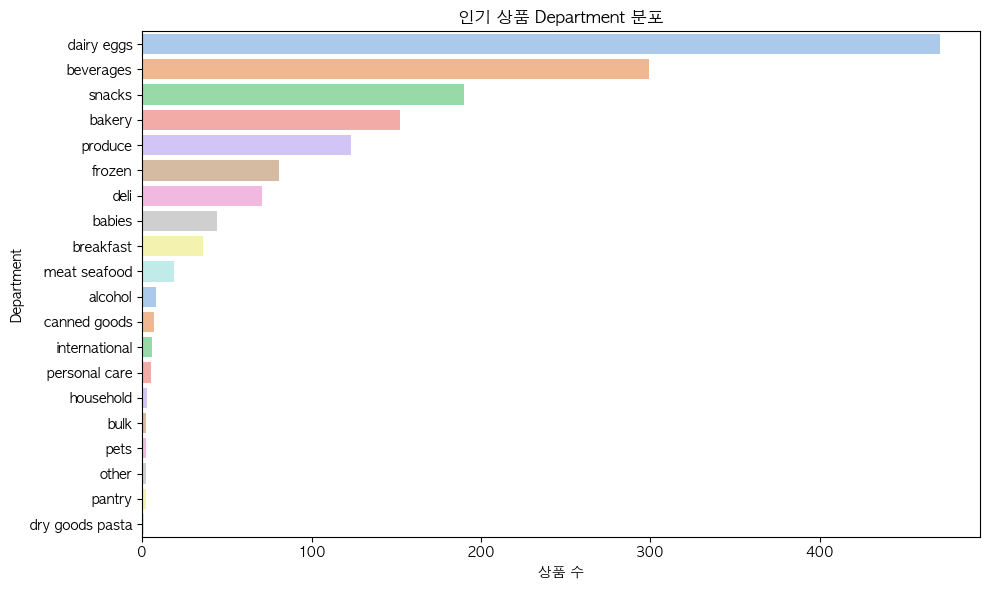

In [188]:
# 인기상품 분포 확인

# 인기 상품 ID 추출
popular_product_ids = popular_products['product_id']

# products, aisles, departments 테이블 합치기
product_detail = products.merge(aisles, on='aisle_id')
product_detail = product_detail.merge(departments, on='department_id')

# 인기 상품에 대한 카테고리 정보만 필터링
popular_product_detail = product_detail[product_detail['product_id'].isin(popular_product_ids)]


# aisle 기준 분포
aisle_counts = popular_product_detail['aisle'].value_counts()

# department 기준 분포
dept_counts = popular_product_detail['department'].value_counts()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 aisle 10개
plt.figure(figsize=(10, 6))
sns.barplot(y=aisle_counts.head(10).index, x=aisle_counts.head(10).values, palette = sns.color_palette('pastel'))
plt.title("인기 상품 상위 Aisle 분포")
plt.xlabel("상품 수")
plt.ylabel("Aisle")
plt.tight_layout()
plt.show()

# 상위 department 분포
plt.figure(figsize=(10, 6))
sns.barplot(y=dept_counts.index, x=dept_counts.values, palette = sns.color_palette('pastel'))
plt.title("인기 상품 Department 분포")
plt.xlabel("상품 수")
plt.ylabel("Department")
plt.tight_layout()
plt.show()



대분류 (department) 에서는 유제품 및 계란(dairy eggs)이 가장 많은 비중을 차지했으며, 
요거트(yogurt)는 소분류 (aisle) 기준에서 가장 인기 있는 품목으로 나타났다.
이는 일상적으로 반복 구매되는 냉장식품이 고객들의 충성도(재구매율)와 직결되는 것 같음
이들을 정기적이고, 기본적인 추천 상품 대상으로 추천하면 좋을 것 같음

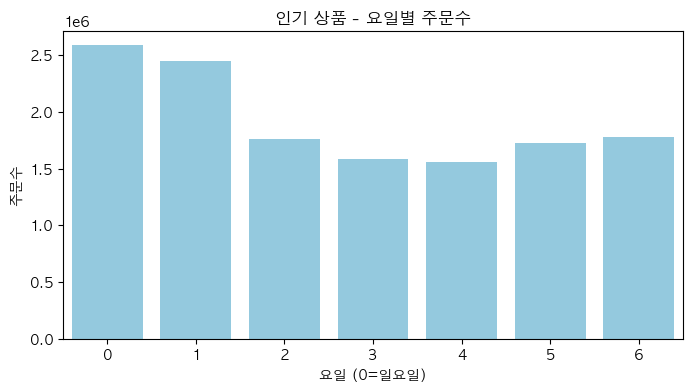

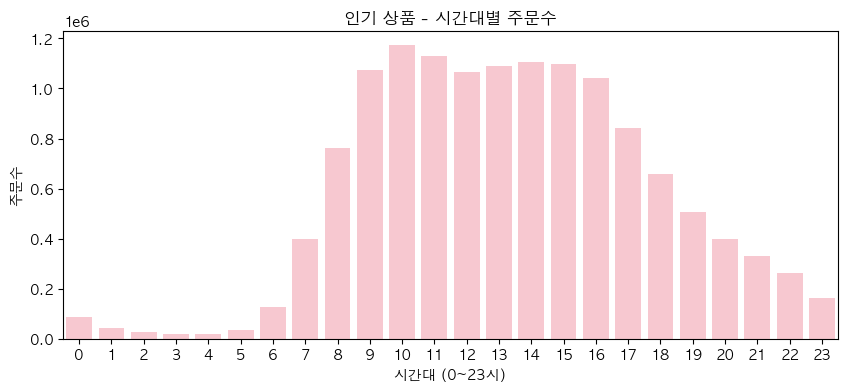

In [193]:
# 인기 상품 ID 목록 추출
popular_product_ids = popular_products['product_id'].unique()

# prior 기준으로 인기 상품 중 시간대/요일 분석
popular_orders = order_prior[order_prior['product_id'].isin(popular_product_ids)]
popular_orders = popular_orders.merge(orders[['order_id', 'order_dow', 'order_hour_of_day']], on='order_id')



import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 주문수
plt.figure(figsize=(8, 4))
sns.countplot(data=popular_orders, x='order_dow', color = 'skyblue')
plt.title('인기 상품 - 요일별 주문수')
plt.xlabel('요일 (0=일요일)')
plt.ylabel('주문수')
plt.show()

# 시간대별 주문수
plt.figure(figsize=(10, 4))
sns.countplot(data=popular_orders, x='order_hour_of_day', color = 'pink')
plt.title('인기 상품 - 시간대별 주문수')
plt.xlabel('시간대 (0~23시)')
plt.ylabel('주문수')
plt.show()


In [ ]:
# 장바구니의 첫번째 상품과 재구매율의 연관성 확인
# 개인 장바구니 품목을 확인하여 다른 사람 장바구니와 비교한 후 인기 상품을 확인하여 재구매율 비교
# 고객 별 평균 구매 간격 + 카테고리 별 평균 구매 간격 -> 고객별, 카테고리별로 얼마나 재구매가 일어나는지

In [ ]:
## 고객 개인 장바구니 분석

# 1단계 고객 개인 장바구니 분석
# 2단계. 장바구니의 첫 번째 상품과 재구매율의 연관성
# 3단계. 개인 장바구니 품목 vs 다른 사람 장바구니와 비교
# 4단계. 고객별 평균 구매 간격
# 5단계. 고객-카테고리별 평균 구매 간격

# 마지막 . 이를 기반으로 종합적으로 -> 고객 세그먼트 만들기

In [203]:
# 고객별 구매한 상품 및 횟수 정리

# 고객별(product_id 기준) 구매 횟수 계산
user_product_counts = prior_df.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
user_product_counts.columns = ['user_id', 'product_id', 'purchase_count']
user_product_counts.head()

,user_id,product_id,purchase_count
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [205]:
# 고객별 Top 상품 선택
top_n = 5  # 개수 설정하기
top_products_per_user = user_product_counts.sort_values(['user_id', 'purchase_count'], ascending=[True, False])
top_products_per_user = top_products_per_user.groupby('user_id').head(top_n)

# 상품 이름 붙이기
top_products_per_user = top_products_per_user.merge(products[['product_id', 'product_name']], on='product_id', how='left')
top_products_per_user.head()

,user_id,product_id,purchase_count,product_name
0,1,196,10,Soda
1,1,12427,10,Original Beef Jerky
2,1,10258,9,Pistachios
3,1,25133,8,Organic String Cheese
4,1,13032,3,Cinnamon Toast Crunch


In [13]:
## 2단계. 고객이 주문한 첫번째 상품 정보 추출하기

## 사용자 별 세그먼트를 모아놓은 데이터셋
user_features = pd.read_csv('/Users/jeonseoyeong/Desktop/패스트캠퍼스 20기(파이썬)/팀플/user_features.csv')
# 1. 유저별 첫 add_to_cart_order 상품 중 reordered 비율 구하기
first_cart = prior_df[prior_df['add_to_cart_order'] == 1]
first_cart_user = first_cart.groupby('user_id')['reordered'].mean().reset_index()
first_cart_user.columns = ['user_id', 'first_cart_reorder_ratio']

# 2. 기존 user_features의 order_based_reorder_ratio와 병합
user_features = user_features.merge(first_cart_user, on='user_id', how='left')
user_features

# # 3. 상관계수 구하기
correlation = user_features[['order_based_reorder_ratio', 'first_cart_reorder_ratio']].corr().iloc[0, 1]
print(f"첫 담은 상품 재주문율과 전체 재주문율의 상관계수: {correlation:.4f}")

첫 담은 상품 재주문율과 전체 재주문율의 상관계수: 0.7250


In [21]:
import scipy.stats as stats

# 1. prior_df에서 add_to_cart_order == 1인 경우만 추출 (첫 담은 상품)
first_cart = prior_df[prior_df['add_to_cart_order'] == 1]

# 2. 유저별로 첫 담은 상품의 재주문율 계산
first_cart_user = first_cart.groupby('user_id')['reordered'].mean().reset_index()
first_cart_user.columns = ['user_id', 'first_cart_reorder_ratio']

# 3. 기존 user_features와 병합
user_features = user_features.merge(first_cart_user, on='user_id', how='left')

# 4. 상관계수 계산
correlation = user_features[['order_based_reorder_ratio', 'first_cart_reorder_ratio']].corr().iloc[0, 1]

# 5. 결과 출력
print(f"첫 담은 상품 재주문율과 전체 재주문율의 상관계수: {correlation:.4f}")



KeyError: "['first_cart_reorder_ratio'] not in index"


그럼 마지막에 담는 상품과는 연관이 있을까?? 아니면 시간대별 ???

나중엔, 클러스터링이나 군집 분석으로 고객 그룹별 재구매 특성 보기 도전..!

In [245]:
# 마지막에 담기는 상품과 재구매율 연관 분석 !

# prior_df에서 각 주문(order_id)별로 마지막에 담긴 상품 추출
last_cart_items = prior_df.loc[prior_df.groupby('order_id')['add_to_cart_order'].idxmax()]

last_cart_stats = last_cart_items.groupby('product_id')['order_id'].count().reset_index()
last_cart_stats.columns = ['product_id', 'last_in_cart_count']

last_cart_compare = last_cart_stats.merge(product_reorder_rate[['reorder_rate', 'product_id']], on='product_id', how='left')

# 결측치가 있으면 0으로 채우기 (안 맞는 경우 대비)
last_cart_compare['reorder_rate'] = last_cart_compare['reorder_rate'].fillna(0)

# 상위 몇 개만 보기
last_cart_compare.sort_values(by='last_in_cart_count', ascending=False).head()


,product_id,last_in_cart_count,reorder_rate
22753,24852,30098,0.843501
12051,13176,29826,0.832555
19332,21137,23477,0.777704
20039,21903,21733,0.772500
43222,47209,15544,0.796553


In [251]:
# 예시: first_in_cart_count 와 reorder_rate 간 피어슨 상관계수
corr, p_value = stats.pearsonr(last_cart_compare['last_in_cart_count'], last_cart_compare['reorder_rate'])
print(f'Pearson correlation: {corr:.3f}, p-value: {p_value:.3e}')

Pearson correlation: 0.163, p-value: 4.025e-267


마지막으로 담기는 상품도 재구매율과 연관 없음 !

그럼 요일, 시간은 연관이 있을까 ???

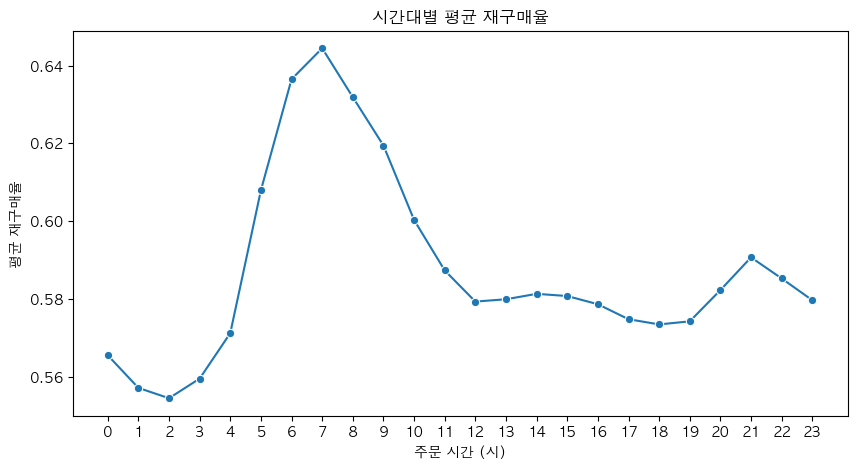

In [280]:
df = prior_df.copy()
hour_reorder = df.groupby('order_hour_of_day')['reordered'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hour_reorder, x='order_hour_of_day', y='reordered', marker='o')
plt.title('시간대별 평균 재구매율')
plt.xlabel('주문 시간 (시)')
plt.ylabel('평균 재구매율')
plt.xticks(range(0,24))
plt.show()


# 아침 6~8시에 가장 재구매율이 높다   ->   시간대별 재구매 패턴을 활용한 푸시 알림 또는 마케팅면에서 활용 가능.

/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_4033/634728109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_dow_reorder, x='order_dow', y='reordered', palette='pastel')


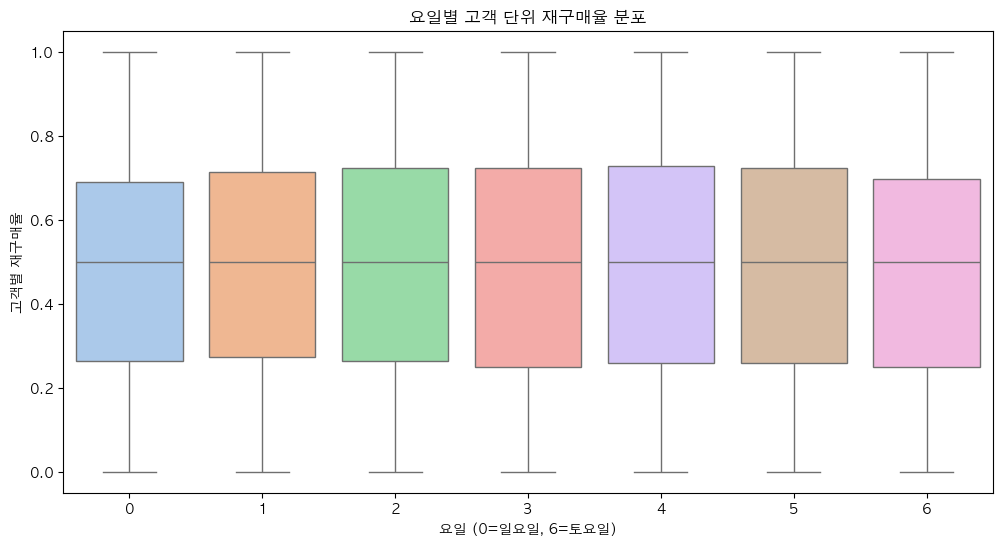

In [286]:
user_dow_reorder = df.groupby(['user_id', 'order_dow'])['reordered'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.boxplot(data=user_dow_reorder, x='order_dow', y='reordered', palette='pastel')
plt.title('요일별 고객 단위 재구매율 분포')
plt.xlabel('요일 (0=일요일, 6=토요일)')
plt.ylabel('고객별 재구매율')
plt.show()


prior_df

, 재구매율은 특정 요일에 크게 영향을 받지 않음 !

-> 여기서 알 수 있는 점은 , 
재구매가 대부분 '필수적이고 일상적인(Daily) 상품'에서 발생한다

-> 앞선 분석에서 일요일과 월요일에 전체 주문량이 높았음
 일・월요일의 높은 주문량은 ‘비일상적 소비(예: 충동구매, 여유시간 소비)’에 가까움.
즉, 이 날들은 데일리 재구매보다는 신규 상품 탐색, 특별한 소비 활동이 더 활발할 수 있음.!

나중에 모델링 할때, 요일에 따라 고객의 소비 성향을 '일상 소비 vs 충동/기획 소비'로 나눠도 좋을 것 같음 ..!

In [311]:
###

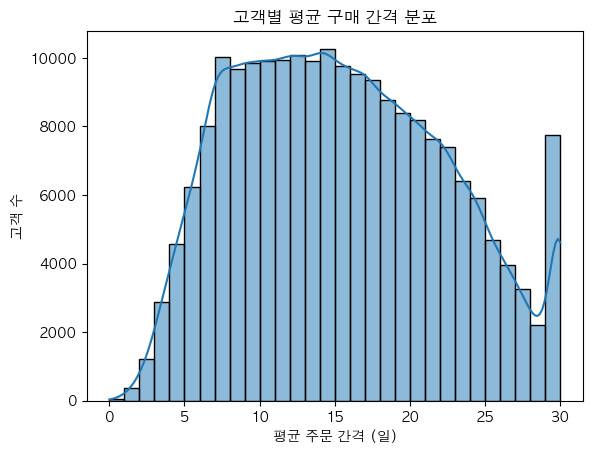

In [309]:

# 고객별 평균 주문 간격 구하기
avg_days_per_user = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
avg_days_per_user.columns = ['user_id', 'avg_days_between_orders']



import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(avg_days_per_user['avg_days_between_orders'], bins=30, kde=True)
plt.title('고객별 평균 구매 간격 분포')
plt.xlabel('평균 주문 간격 (일)')
plt.ylabel('고객 수')
plt.show()


- 한 1~2주 간격으로 재구매를 많이 함.
- 이는 많은 고객들이 주 1회 혹은 격주 간격으로 장을 본다는 것을 의미함.

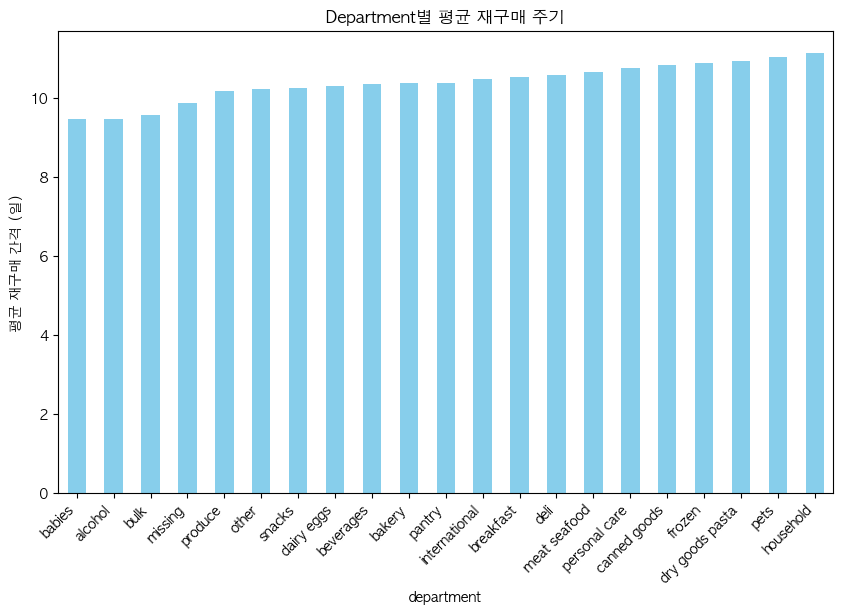

In [339]:
# 카테고리별 재구매 비율

department_reorder_days = prior_df.groupby('department')['days_since_prior_order'].mean().sort_values()

plt.figure(figsize=(10,6))
department_reorder_days.plot(kind='bar', color='skyblue')
plt.ylabel('평균 재구매 간격 (일)')
plt.title('Department별 평균 재구매 주기')
plt.xticks(rotation=45, ha='right')
plt.show()



구매 주기가 짧은 카테고리 :
babies (아기 용품): 육아 필수품이라 빨리 소진돼서 자주 재구매할 가능성이 높고,

alcohol (주류): 소모가 빠르거나, 파티/모임 등으로 일정 주기로 구매하는 경우,

bulk (대용량 상품): 많이 사서 금방 줄지만 정기적으로 구매하는 고객들이 많을 수 있다.

그렇다면 구매주기가 짧은 만큼 재구매율도 높을까????

In [343]:
# 1. 부서별 평균 구매 주기 구하기
avg_interval_by_dept = prior_df.groupby('department')['days_since_prior_order'].mean().reset_index()
avg_interval_by_dept.columns = ['department', 'avg_reorder_interval']

# 2. 기존 재구매율 데이터와 병합
dept_stats = pd.merge(department_reorder, avg_interval_by_dept, on='department')

# 3. 정렬 (원하면)
dept_stats = dept_stats.sort_values(by='reordered', ascending=False)

print(dept_stats.head())


   department  reordered  avg_reorder_interval
0  dairy eggs   0.669969             10.310501
1   beverages   0.653460             10.364647
2     produce   0.649913             10.186943
3      bakery   0.628141             10.383543
4        deli   0.607719             10.589108


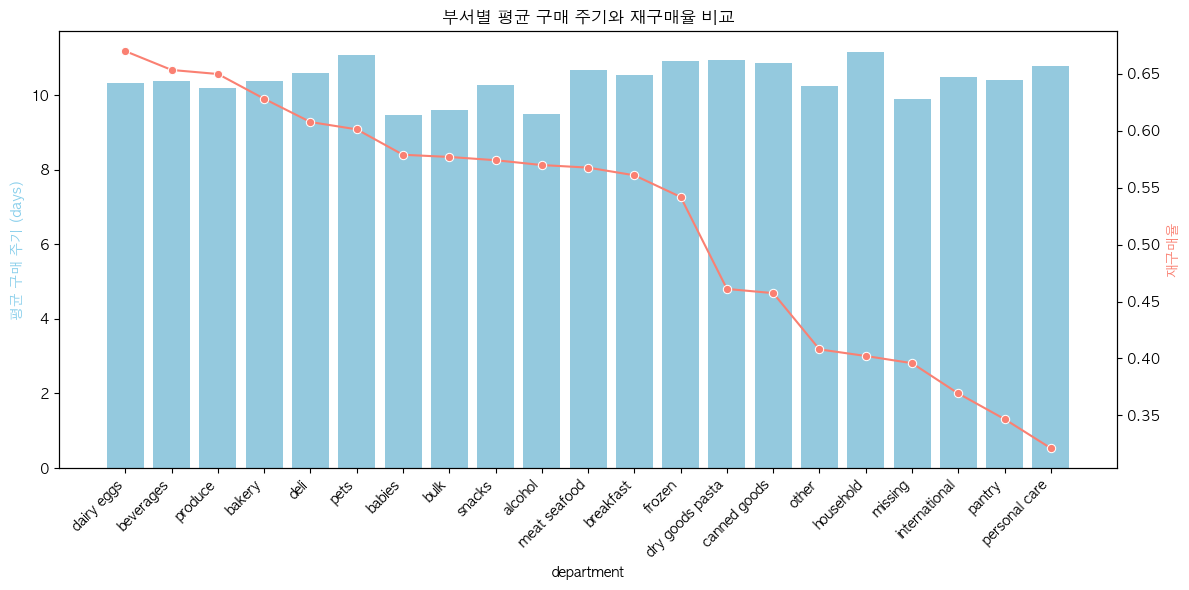

In [361]:

import warnings
warnings.filterwarnings('ignore')

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data=dept_stats, x='department', y='avg_reorder_interval', ax=ax1, color='skyblue')
ax1.set_ylabel('평균 구매 주기 (days)', color='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(data=dept_stats, x='department', y='reordered', ax=ax2, color='salmon', marker='o')
ax2.set_ylabel('재구매율', color='salmon')

plt.title('부서별 평균 구매 주기와 재구매율 비교')
plt.tight_layout()
plt.show()


In [365]:
department_stats = prior_df.groupby('department').agg(
    reorder_rate = ('reordered', 'mean'),
    avg_reorder_interval = ('days_since_prior_order', 'mean')
).reset_index()

corr = department_stats['avg_reorder_interval'].corr(department_stats['reorder_rate'])
print(f"구매주기와 재구매율의 상관계수: {corr:.3f}")

구매주기와 재구매율의 상관계수: -0.241


- 지금까지 얻은 인사이트

- 재구매를 하는 상품이 하나라도 있는 경우가 많다.
- 그러나 상품단위 재구매율 분포를 보면 0.3~0.5가 가장 많다.(즉, 상품 하나하나에 대해 다시 사는 비율은 그리 높지 않다는걸 의미)


-> 고객은 여러 상품을 사보지만, 대부분은 주문에는 한 두개라도 익숙한 상품 (재구매 상품)을 담는다.
 -> 즉, 고객은 늘 다시 사는 익숙한 몇몇 상품을 중심으로, 새로운 상품들도 구매하는 경향을 보인다
상품별 :  다양한 식음료, 개인 관리, 유아용품, 주류 등이 포함되어 있음
카테고리별 : 유제품, 음료, 농산물이 가장 높음

그렇다면, 주문건수도 많으면서 재구매율도 높은 상품은 뭘까?

대분류 (department) 에서는 유제품 및 계란(dairy eggs)이 가장 많은 비중을 차지했으며, 
요거트(yogurt)는 소분류 (aisle) 기준에서 가장 인기 있는 품목으로 나타났다.
이는 일상적으로 반복 구매되는 냉장식품이 고객들의 충성도와 직결된다는 것을 의미하며,
이는 정기적이고, 기본적인 추천 상품 대상으로 적합할 수 있다고 생각한다.
처음 장바구니에 자주 담기는 상품과 재구매율은 연관이 없음 ...
마지막으로 담기는 상품도 재구매율과 연관 없음 !

아침 6~8시에 가장 재구매율이 높다

재구매율은 특정 요일에 크게 영향을 받지 않음 !

-> 여기서 알 수 있는 점은 , 
재구매가 대부분 필수적이고 일상적인(Daily) 상품에서 발생한다

-> 앞선 분석에서 일요일과 월요일에 전체 주문량이 높았음
 일・월요일의 높은 주문량은 ‘비일상적 소비(예: 충동구매, 여유시간 소비)’에 가까움.
즉, 이 날들은 데일리 재구매보다는 신규 상품 탐색, 특별한 소비 활동이 더 활발할 수 있음.!
- 한 1~2주 간격으로 재구매를 많이 함.
- 이는 많은 고객들이 주 1회 혹은 격주 간격으로 장을 본다는 것을 의미함.

구매 주기가 짧은 카테고리 :
babies (아기 용품): 육아 필수품이라 빨리 소진돼서 자주 재구매할 가능성이 높고,

alcohol (주류): 소모가 빠르거나, 파티/모임 등으로 일정 주기로 구매하는 경우,

bulk (대용량 상품): 많이 사서 금방 줄지만 정기적으로 구매하는 고객들이 많을 수 있어.

그렇다면 구매주기가 짧은 만큼 재구매율도 높을까???? 그렇지 않다 !  

추천 시스템 기획 시 시사점

- 요거트, 유제품처럼 반복 구매가 잦은 카테고리는 정기 추천이나 구독 모델에 적합

- 반면, 신규 상품 탐색이 활발한 요일(일, 월)엔 신상품, 프로모션 중심 추천 전략 필요

첫 장바구니, 마지막 장바구니 상품과 재구매율의 무관성은 고객 행동 다양성 반영, 개인화 추천 시 고려 .. 

구매주기와 재구매율 간 약한 상관은 추천 주기나 재고 관리 전략 설계 시 참고 가능 

추가 제안

고객 세분화(예: 재구매율 높은 고객군 vs 낮은 고객군)별 추천 전략 차별화

시간대별 재구매 패턴을 활용한 푸시 알림 또는 마케팅 타이밍 최적화

### 고객 세그먼트 만들기 (재구매 중심)

1. 고객 세그먼트 만들기 (재구매 중심)
재구매율 기준으로 고객을 3~4개 그룹으로 나누기

예: 재구매율 상위 25% (충성 고객), 중간 50%, 하위 25% (잠재 고객)

각 그룹별로 구매 패턴, 선호 상품, 구매 주기 등을 분석해 특성 파악

2. 고객 세그먼트별 추천 전략 설계
충성 고객: 좋아하는 상품이나 카테고리 중심으로 ‘재구매 가능한 상품’ 집중 추천

중간 그룹: 재구매율 높은 인기 상품과 고객 관심사 기반 ‘재구매 유도’ 추천

잠재 고객: 인기 상품 + 신규 상품 혼합 추천으로 재구매 경험 유도

3. 상품-상품 협업 필터링 기반 추천 구축
상품 간 유사도 행렬 활용 (예: “이 상품 산 사람은 이 상품도 샀어요”)

고객이 최근 구매한 상품을 기준으로 유사 상품 추천

재구매율이 높은 상품을 우선 추천 리스트에 반영하면 효과적

4. 고객 구매 주기, 시간대, 요일 특성 반영
구매 주기가 짧은 고객에게는 주기 맞춘 리마인드 추천

아침 6~8시 재구매율이 높으니 그 시간대 프로모션, 알림 활용

In [380]:
# 1) 재구매율 기준으로 고객 세그먼트 만들기 예시
import pandas as pd
user_reorder['segment'] = pd.qcut(user_reorder['reorder_ratio'], q=4, labels=['low', 'mid-low', 'mid-high', 'high'])

# 2) 각 세그먼트별 고객 수 확인
print(user_reorder['segment'].value_counts())

# 3) 세그먼트별 구매 패턴/선호 상품 분석 (예: 구매 빈도, 인기 상품)
# (필요하면 내가 구체 코드도 짜줄게!)
user_reorder

segment
low         54313
mid-low     52814
mid-high    50162
high        48920
Name: count, dtype: int64


,user_id,total_orders,reordered_orders,reorder_ratio,segment
0,1,10,9.0,0.900000,mid-high
1,2,14,12.0,0.857143,mid-high
2,3,12,11.0,0.916667,mid-high
3,4,5,1.0,0.200000,low
4,5,4,3.0,0.750000,mid-low
...,...,...,...,...,...
206204,206205,3,2.0,0.666667,low
206205,206206,67,63.0,0.940299,high
206206,206207,16,15.0,0.937500,high
206207,206208,49,48.0,0.979592,high


In [410]:
## 사용자 별 세그먼트를 모아놓은 데이터셋
user_features = pd.read_csv('/Users/jeonseoyeong/Desktop/패스트캠퍼스 20기(파이썬)/팀플/user_features.csv')

In [411]:
user_features

# reordered_counts :사용자가 재구매한 상품의 총 개수 (건수 기준)
# reordered_orders : 사용자가 재구매를 한 번이라도 포함한 주문의 수 (주문 기준)
# product_based_reorder_ratio  = (reordered_counts / total_products)
#             : 전체 상품 중 몇 개를 재구매했는가
# order_based_reorder_ratio = (reordered_orders / total_orders)
#  : 전체 주문 중 재구매가 포함된 주문 비율

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,water seltzer sparkling water,white wines,yogurt,total_orders,total_products,reordered_counts,avg_days_between_orders,reordered_orders,product_based_reorder_ratio,order_based_reorder_ratio
0,1,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.016949,10,59,41,18.542373,9.0,0.694915,0.900000
1,2,0.0,0.015385,0.00000,0.0,0.000000,0.0,0.010256,0.000000,0.0,...,0.010256,0.0,0.215385,14,195,93,14.902564,12.0,0.476923,0.857143
2,3,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.022727,0.0,0.000000,12,88,55,10.181818,11.0,0.625000,0.916667
3,4,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.055556,0.0,0.000000,5,18,1,11.944444,1.0,0.055556,0.200000
4,5,0.0,0.054054,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.081081,4,37,14,10.189189,3.0,0.378378,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,0.0,0.000000,0.03125,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.156250,3,32,8,9.687500,2.0,0.250000,0.666667
206205,206206,0.0,0.014035,0.00000,0.0,0.000000,0.0,0.014035,0.003509,0.0,...,0.003509,0.0,0.000000,67,285,135,3.985965,63.0,0.473684,0.940299
206206,206207,0.0,0.000000,0.00000,0.0,0.004484,0.0,0.000000,0.000000,0.0,...,0.049327,0.0,0.067265,16,223,131,13.278027,15.0,0.587444,0.937500
206207,206208,0.0,0.004431,0.00000,0.0,0.004431,0.0,0.005908,0.000000,0.0,...,0.000000,0.0,0.048744,49,677,479,7.310192,48.0,0.707533,0.979592
